In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from dataclasses import dataclass, asdict
import numpy as np

In [ ]:
from transformers import GPT2Tokenizer, GPT2Model, GPT2LMHeadModel, GPT2ForSequenceClassification, pipeline, set_seed

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
model_base = GPT2Model.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')
model_seq = GPT2ForSequenceClassification.from_pretrained('gpt2')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
tokenizer

GPT2Tokenizer(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}

In [ ]:
model_base

GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2SdpaAttention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)

In [ ]:
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [ ]:
model_seq

GPT2ForSequenceClassification(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (score): Linear(in_features=768, out_features=2, bias=False)
)

Text(0.5, 1.0, 'GPT2 PE')

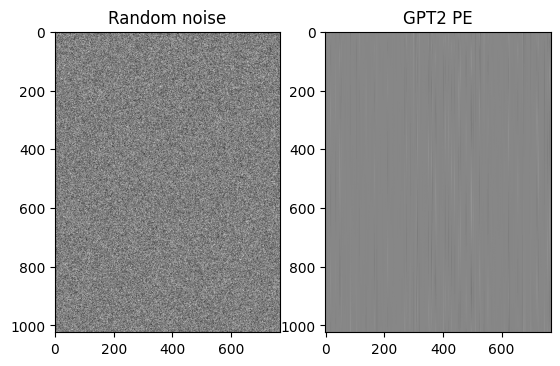

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(torch.rand(1024, 768).numpy(), cmap='gray')
axes[0].set_title('Random noise')
axes[1].imshow(model.state_dict()['transformer.wpe.weight'], cmap='gray')
axes[1].set_title('GPT2 PE')

Text(0.5, 1.0, 'Plot of different channels for each position')

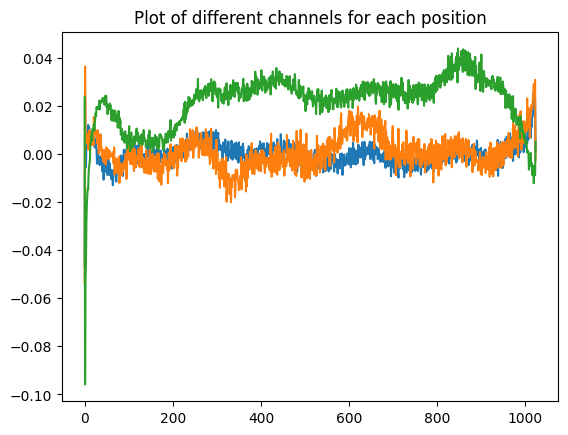

In [ ]:
plt.plot(model.state_dict()['transformer.wpe.weight'][:, 150])
plt.plot(model.state_dict()['transformer.wpe.weight'][:, 200])
plt.plot(model.state_dict()['transformer.wpe.weight'][:, 250])
plt.title('Plot of different channels for each position')

In [ ]:
set_seed(42)
generator = pipeline('text-generation', model='gpt2')
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, but what I'm really doing is making a human-readable document. There are other languages, but those are"},
 {'generated_text': "Hello, I'm a language model, not a syntax model. That's why I like it. I've done a lot of programming projects.\n"},
 {'generated_text': "Hello, I'm a language model, and I'll do it in no time!\n\nOne of the things we learned from talking to my friend"},
 {'generated_text': "Hello, I'm a language model, not a command line tool.\n\nIf my code is simple enough:\n\nif (use (string"},
 {'generated_text': "Hello, I'm a language model, I've been using Language in all my work. Just a small example, let's see a simplified example."}]

In [ ]:
device = 'cpu'

In [ ]:
class CausalSelfAttention(nn.Module):
  def __init__(self, config):
    super().__init__()

    head_size = config.n_embd // config.n_head
    self.n_embd = config.n_embd
    self.n_head = config.n_head
    self.c_attn = nn.Linear(config.n_embd, 3 * config.n_head * head_size)
    self.c_proj = nn.Linear(config.n_head * head_size, config.n_embd)
    # will not be considered model parameter
    self.register_buffer('bias', torch.tril(torch.ones(1, 1, config.n_ctx, config.n_ctx)) == 0, persistent=False)

    # tie token embedding weight with lm_head
    self.lm_head.weight = self.transformer.wte.weight

  def forward(self, x):
    b, t, c = x.shape

    q, k, v = self.c_attn(x).split(self.n_embd, dim=-1)
    q = q.view(b, t, self.n_head, -1) # b, t, n_head, head_size
    k = k.view(b, t, self.n_head, -1) # b, t, n_head, head_size
    v = v.view(b, t, self.n_head, -1) # b, t, n_head, head_size
    q = q.transpose(1,2) # b, n_head, t, head_size
    k = k.transpose(1,2) # b, n_head, t, head_size
    v = v.transpose(1,2) # b, n_head, t, head_size

    if hasattr(F, 'scaled_dot_product_attention'):
      attn = F.scaled_dot_product_attention(q, k, v, is_causal=True)
    else:
      wei = (q @ k.transpose(2, 3)) * (1 / np.sqrt(k.shape[-1])) # b, n_head, t, t
      wei = wei.masked_fill(self.bias[:, :, :t, :t], float('-inf')) # mask upper triangular elements
      wei = F.softmax(wei, dim=-1)
      attn = wei @ v # b, n_head, t, head_size

    attn = attn.transpose(1, 2) # b, t, n_head, head_size
    attn = attn.reshape(b, t, -1) # b, t, c
    proj = self.c_proj(attn)

    return proj

class MLP(nn.Module):
  def __init__(self, config):
    super().__init__()

    self.c_fc = nn.Linear(config.n_embd, 4 * config.n_embd)
    self.act = nn.GELU(approximate='tanh')
    self.c_proj = nn.Linear(4 * config.n_embd, config.n_embd)

  def forward(self, x):
    x = self.act(self.c_fc(x))
    x = self.c_proj(x)
    return x

class Block(nn.Module):
  def __init__(self, config):
    super().__init__()

    self.ln_1 = nn.LayerNorm(config.n_embd)
    self.attn = CausalSelfAttention(config)
    self.ln_2 = nn.LayerNorm(config.n_embd)
    self.mlp = MLP(config)

  def forward(self, x):
    x = self.attn(self.ln_1(x)) + x
    x = self.mlp(self.ln_2(x)) + x
    return x

@dataclass
class GPTConfig:
  n_ctx: int = 1024 # max sequence length
  vocab_size: int = 50257 # 50,000 BPE merges + 256 bytes tokens + 1 <|endoftext|> token
  n_layer: int = 12 # number of layers
  n_head: int = 12 # number of heads
  n_embd: int = 768 # embedding dimensions

class GPT(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.config = config

    self.transformer = nn.ModuleDict(dict(
        wte = nn.Embedding(config.vocab_size, config.n_embd),
        wpe = nn.Embedding(config.n_ctx, config.n_embd),
        h = nn.ModuleList([Block(config) for _ in range(config.n_layer)]),
        ln_f = nn.LayerNorm(config.n_embd),
    ))
    self.lm_head = nn.Linear(config.n_embd, config.vocab_size, bias=False)

  def forward(self, idx):
    b, t = idx.shape
    assert t <= self.config.n_ctx, "Number of tokens should not exceed block size"

    te = self.transformer.wte(idx) # b, t, n_embd
    pe = self.transformer.wpe(torch.arange(t).to(device)) # t, n_embd
    x = te + pe
    for block in self.transformer.h:
      x = block(x)
    x = self.transformer.ln_f(x)
    logits = self.lm_head(x) # b, t, vocab_size
    return logits

  @classmethod
  def from_pretrained(cls, model='gpt2'):
    hf_model = GPT2LMHeadModel.from_pretrained(model)
    state = hf_model.state_dict()
    for k, v in state.items():
      if 'c_' not in k: continue
      if len(v.shape) != 2: continue
      state[k] = v.T
    config = GPTConfig(
      n_ctx=hf_model.config.n_ctx,
      vocab_size=hf_model.config.vocab_size,
      n_layer=hf_model.config.n_layer,
      n_head=hf_model.config.n_head,
      n_embd=hf_model.config.n_embd,
    )
    gpt = GPT(config)
    gpt.load_state_dict(state)
    return gpt

In [ ]:
gpt = GPT.from_pretrained('gpt2')

In [ ]:
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='pt')

In [ ]:
model = GPT2LMHeadModel.from_pretrained('gpt2')
model.eval()

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [ ]:
model(encoded_input['input_ids']).logits

tensor([[[ -28.7086,  -27.9282,  -30.2394,  ...,  -37.6027,  -35.8095,
           -28.8439],
         [ -60.0999,  -57.8383,  -62.0975,  ...,  -68.0317,  -67.7715,
           -60.5209],
         [ -76.6621,  -78.3350,  -83.4317,  ...,  -89.8897,  -89.1758,
           -81.1512],
         ...,
         [-145.1964, -145.4156, -150.1035,  ..., -153.6665, -150.1051,
          -146.9225],
         [ -84.2474,  -85.6009,  -91.2381,  ...,  -99.5434,  -97.8360,
           -88.2612],
         [-122.2600, -121.1204, -121.5651,  ..., -131.8222, -131.5997,
          -115.1341]]], grad_fn=<UnsafeViewBackward0>)

In [ ]:
gpt(encoded_input['input_ids'])

tensor([[[ -28.7086,  -27.9282,  -30.2394,  ...,  -37.6027,  -35.8095,
           -28.8439],
         [ -60.0999,  -57.8383,  -62.0976,  ...,  -68.0317,  -67.7715,
           -60.5209],
         [ -76.6621,  -78.3350,  -83.4317,  ...,  -89.8897,  -89.1758,
           -81.1512],
         ...,
         [-145.1964, -145.4156, -150.1034,  ..., -153.6665, -150.1051,
          -146.9225],
         [ -84.2474,  -85.6009,  -91.2381,  ...,  -99.5434,  -97.8360,
           -88.2612],
         [-122.2600, -121.1204, -121.5650,  ..., -131.8222, -131.5997,
          -115.1341]]], grad_fn=<UnsafeViewBackward0>)

In [ ]:
torch.allclose(model(encoded_input['input_ids']).logits, gpt(encoded_input['input_ids']))

True

In [ ]:
torch.manual_seed(42)
inp = tokenizer.encode(text, return_tensors='pt')
for i in range(10):
  logits = model(inp).logits[:, -1: :].squeeze(1) # b, vocab_size
  probs = F.softmax(logits, dim=-1)
  topk_probs, topk_idx = torch.topk(probs, 50, dim=-1)
  idx_idx = torch.multinomial(topk_probs, 1) # b, 1
  idx = torch.gather(topk_idx, 1, idx_idx) # b, 1
  inp = torch.cat((inp, idx), dim=-1)

In [ ]:
torch.manual_seed(42)
inp = tokenizer.encode(text, return_tensors='pt')
for i in range(10):
  logits = gpt(inp)[:, -1: :].squeeze(1) # b, vocab_size
  probs = F.softmax(logits, dim=-1)
  topk_probs, topk_idx = torch.topk(probs, 50, dim=-1)
  idx_idx = torch.multinomial(topk_probs, 1) # b, 1
  idx = torch.gather(topk_idx, 1, idx_idx) # b, 1
  inp = torch.cat((inp, idx), dim=-1)

In [ ]:
tokenizer.batch_decode(inp)

["Replace me by any text you'd like.\n\nI do want you to help me with"]

In [ ]:
tokenizer.batch_decode(inp)

["Replace me by any text you'd like.\n\nI do want you to help me with"]

In [ ]:
inp = tokenizer.encode(text, return_tensors='pt')

In [ ]:
logits = gpt(inp)[:, -1: :].squeeze(1) # b, vocab_size

In [ ]:
probs = F.softmax(logits, dim=-1)

In [ ]:
probs

tensor([[1.6101e-05, 5.0322e-05, 3.2259e-05,  ..., 1.1324e-09, 1.4147e-09,
         2.0025e-02]], grad_fn=<SoftmaxBackward0>)

In [ ]:
torch.multinomial(torch.topk(probs, 50, dim=-1).values, 22)

tensor([[ 0,  1,  7,  3, 45, 42, 35,  2,  8, 47, 14,  6, 11, 40, 33, 12,  4, 23,
         30, 27,  5, 48]])